# Applied Machine Learning
# ASL Gesture Recognition Using CNNs for Real-Time Translation
### Professor: Aiymbay Sunggat
### Srudents: Zhantore Darmenov & Madiyar Abatov

Our dataset is from kaggle (https://www.kaggle.com/datasets/debashishsau/aslamerican-sign-language-aplhabet-dataset)

### Defining libraries, path & data preprocessing

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

Define Paths and Constants

In [ ]:
train_path = r"C:\Users\Admin\Desktop\sabaq(C3T1)\C3T1\Applied ML\aml_final\ASL_Alphabet_Dataset\train"
val_path = r"C:\Users\Admin\Desktop\sabaq(C3T1)\C3T1\Applied ML\aml_final\ASL_Alphabet_Dataset\val"
test_path = r"C:\Users\Admin\Desktop\sabaq(C3T1)\C3T1\Applied ML\aml_final\ASL_Alphabet_Dataset\test"

IMG_SIZE = 224  # Use 224x224 for pretrained models
BATCH_SIZE = 32
EPOCHS = 10  # Adjust for runtime balance

# Classes (labels in dataset)
classes = sorted(os.listdir(train_path))
print(f"Classes: {classes}")

Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


Visualize Sample Training Data

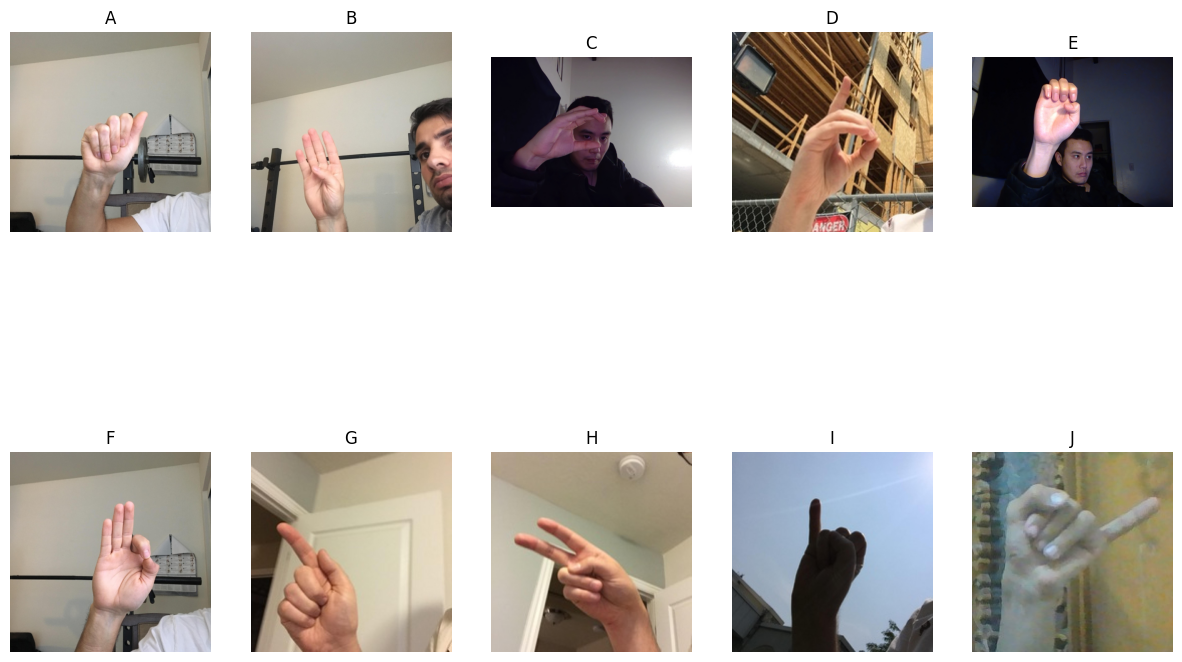

In [ ]:
# Function to visualize samples
def visualize_samples(path, classes):
    plt.figure(figsize=(15, 10))
    for i, label in enumerate(classes[:10]):  # Display the first 10 classes
        folder = os.path.join(path, label)
        image_path = os.path.join(folder, os.listdir(folder)[0])  # Get the first image in each folder
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 5, i + 1)
        plt.imshow(image)
        plt.title(label)
        plt.axis("off")
    plt.show()

visualize_samples(train_path, classes)

Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(train_path, target_size=(IMG_SIZE, IMG_SIZE),
                                                    batch_size=BATCH_SIZE, class_mode='sparse')
val_generator = val_datagen.flow_from_directory(val_path, target_size=(IMG_SIZE, IMG_SIZE),
                                                batch_size=BATCH_SIZE, class_mode='sparse')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(IMG_SIZE, IMG_SIZE),
                                                  batch_size=BATCH_SIZE, class_mode='sparse', shuffle=False)

Found 178447 images belonging to 29 classes.
Found 44627 images belonging to 29 classes.
Found 0 images belonging to 0 classes.


### CNN Model

Build the Model

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze base model layers

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the Model

In [10]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS,
                    callbacks=[reduce_lr, early_stopping])

Epoch 1/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 3087s 553ms/step - accuracy: 0.3989 - loss: 2.0898 - val_accuracy: 0.8415 - val_loss: 0.6131 - learning_rate: 1.0000e-04
Epoch 2/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 3067s 550ms/step - accuracy: 0.6812 - loss: 1.0628 - val_accuracy: 0.8779 - val_loss: 0.4449 - learning_rate: 1.0000e-04
Epoch 3/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 3165s 568ms/step - accuracy: 0.7336 - loss: 0.8698 - val_accuracy: 0.8986 - val_loss: 0.3690 - learning_rate: 1.0000e-04
Epoch 4/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 3064s 549ms/step - accuracy: 0.7634 - loss: 0.7688 - val_accuracy: 0.9071 - val_loss: 0.3289 - learning_rate: 1.0000e-04
Epoch 5/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 3068s 550ms/step - accuracy: 0.7823 - loss: 0.7046 - val_accuracy: 0.9143 - val_loss: 0.2945 - learning_rate: 1.0000e-04
Epoch 6/10
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 3074s 551ms/step - accuracy: 0.7938 - loss: 0.6623 - val_accuracy: 0.9188 - val_loss: 0.2815 - learning_rate: 1.0000e-04
Epoch 7/10
5577/5577 ━

In [13]:
model.save("asl_model.keras")
print("Model saved successfully in Keras format!")

Model saved successfully in Keras format!


#### Fine-Tune the Model

In [14]:
base_model.trainable = True  # Unfreeze base model
for layer in base_model.layers[:-10]:  # Freeze all but the last 10 layers
    layer.trainable = False

# Recompile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fine-tune
history_fine = model.fit(train_generator, validation_data=val_generator, epochs=2,
                         callbacks=[reduce_lr, early_stopping])

Epoch 1/2
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 4433s 794ms/step - accuracy: 0.7177 - loss: 0.9127 - val_accuracy: 0.9194 - val_loss: 0.2575 - learning_rate: 1.0000e-05
Epoch 2/2
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 0s 769ms/step - accuracy: 0.8106 - loss: 0.5968

KeyboardInterrupt: 

In [16]:
model.save("asl_model_interrupted.keras")
print("Model saved successfully after interruption!")

Model saved successfully after interruption!


In [18]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("asl_model_interrupted.keras")

# Resume fine-tuning from the next epoch
history_fine_continued = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=4,  # Continue training for more epochs
    initial_epoch=2,  # Start from epoch 3 (as 2 epochs were completed)
    callbacks=[reduce_lr, early_stopping]
)

Epoch 3/4
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 3524s 631ms/step - accuracy: 0.8368 - loss: 0.5114 - val_accuracy: 0.9469 - val_loss: 0.1727 - learning_rate: 1.0000e-05
Epoch 4/4
5577/5577 ━━━━━━━━━━━━━━━━━━━━ 4037s 724ms/step - accuracy: 0.8557 - loss: 0.4544 - val_accuracy: 0.9540 - val_loss: 0.1477 - learning_rate: 1.0000e-05


Save the Model

In [19]:
model.save("asl_model_finetuned.keras")
print("Model saved successfully")

Model saved successfully


### Evaluation of the Model on Test Data

In [23]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False
)

# Verify test generator
print(f"Samples in test_generator: {test_generator.samples}")
print(f"Class indices: {test_generator.class_indices}")

Found 28 images belonging to 28 classes.
Samples in test_generator: 28
Class indices: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'nothing': 26, 'space': 27}


In [24]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9286 - loss: 1.8817
Test Loss: 1.8817321062088013
Test Accuracy: 0.9285714030265808


Visualize Training Performance

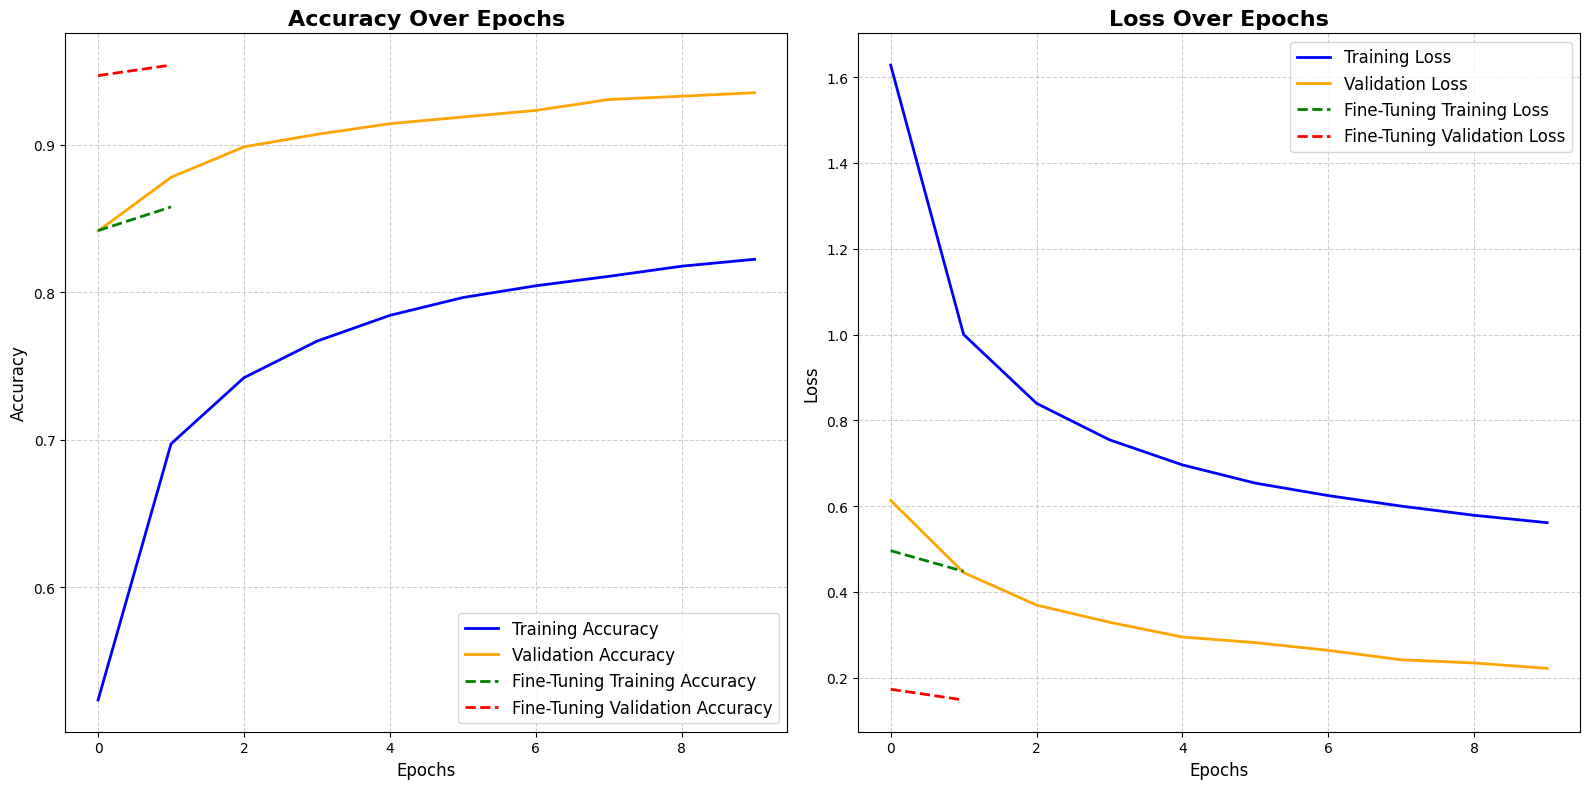

In [30]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(16, 8))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
plt.plot(history_fine_continued.history['accuracy'], label='Fine-Tuning Training Accuracy', linestyle='dashed', color='green', linewidth=2)
plt.plot(history_fine_continued.history['val_accuracy'], label='Fine-Tuning Validation Accuracy', linestyle='dashed', color='red', linewidth=2)
plt.title('Accuracy Over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.plot(history_fine_continued.history['loss'], label='Fine-Tuning Training Loss', linestyle='dashed', color='green', linewidth=2)
plt.plot(history_fine_continued.history['val_loss'], label='Fine-Tuning Validation Loss', linestyle='dashed', color='red', linewidth=2)
plt.title('Loss Over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()

Visualize Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


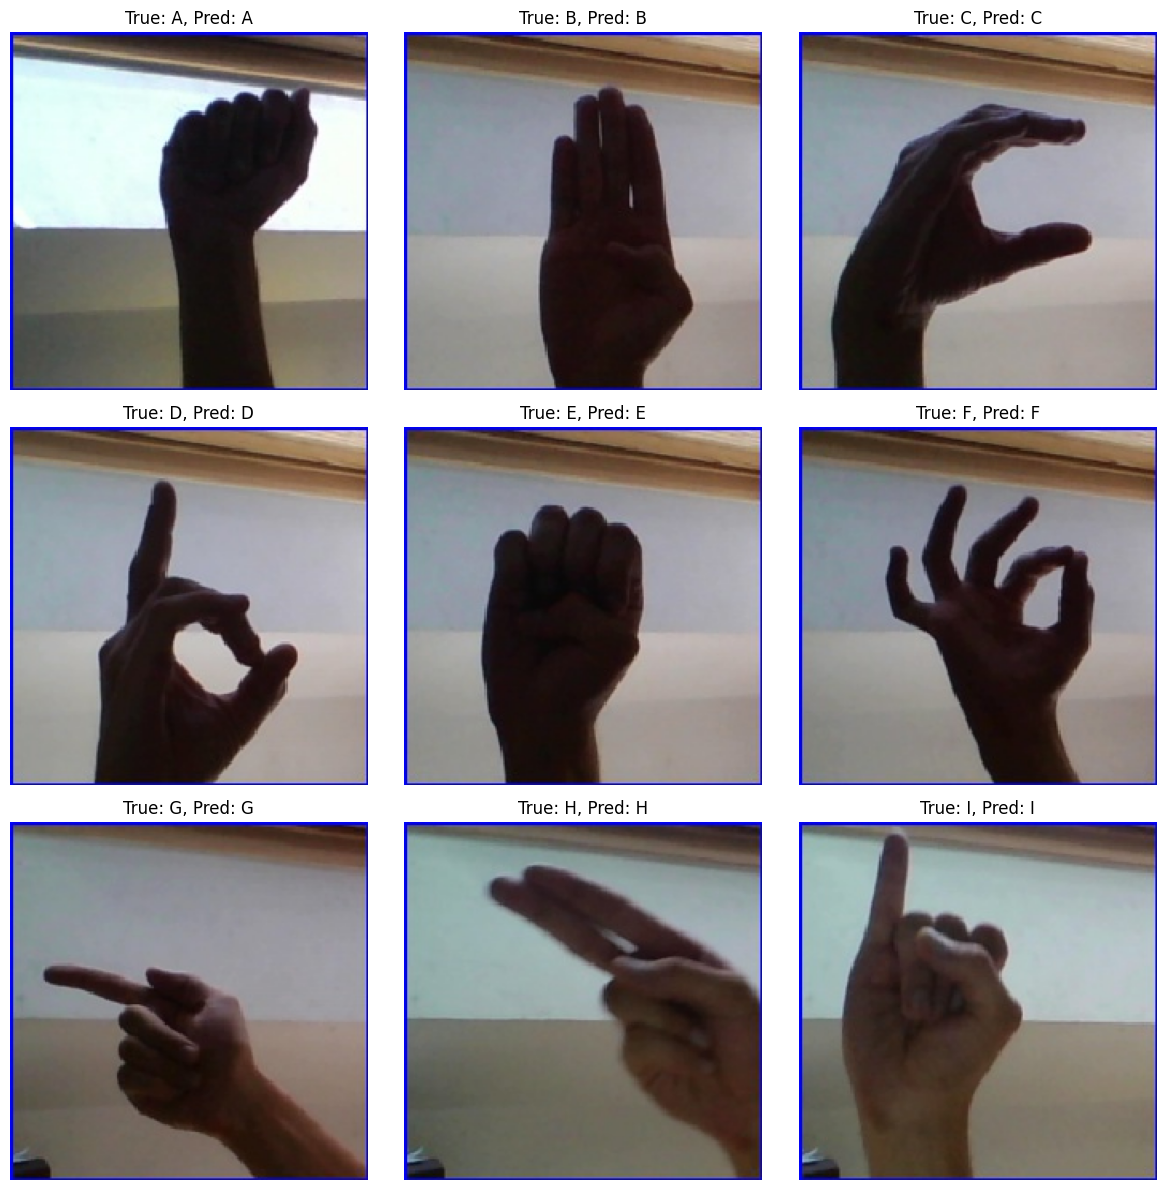

In [34]:
# Make predictions on the test data
predictions = model.predict(test_generator, verbose=1)  # Predict using the test generator
predicted_labels = np.argmax(predictions, axis=1)

# Map the class indices from the data generator
index_to_class = {v: k for k, v in train_generator.class_indices.items()}

# Extract the test images and true labels from the generator
test_images, test_labels = next(test_generator)  # Get all data in a single batch

# Visualize predictions
plt.figure(figsize=(12, 12))
num_images = min(9, len(test_images))  # Show up to 9 images or fewer if not available

for i in range(num_images):
    image = test_images[i]
    true_label = test_labels[i]
    predicted_label = predicted_labels[i]
    
    # Plot the image
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"True: {index_to_class.get(true_label, 'Unknown')}, Pred: {index_to_class.get(predicted_label, 'Unknown')}")
    plt.axis('off')

plt.tight_layout()
plt.show()